# **E-tivity 3: Clustering and Manifold Learning**

 **STUDENT ID-20023693** 
 
 **STUDENT NAME-RIYA JOE** 

# **TASK1**

**IMPORT ALL PACKAGES AND LOAD DATA SET**

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.metrics import silhouette_score
from sklearn import manifold 
from sklearn import cluster 
from sklearn.cluster import KMeans
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
df = pd.read_csv("./loans_train_prepared-1.csv")
data= np.array(df.values, dtype=float)
data_temp=np.array(df.values, dtype=float)
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   ApplicantIncome          614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    int64  
 5   Gender_Male              614 non-null    int64  
 6   Gender_nan               614 non-null    int64  
 7   Married_Yes              614 non-null    int64  
 8   Married_nan              614 non-null    int64  
 9   Self_Employed_Yes        614 non-null    int64  
 10  Self_Employed_nan        614 non-null    int64  
 11  Education_Not Graduate   614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  Loan_Status_Y            6

# **TASK2 - MDS and T-SNE visualisations using K-means**

The KMeans estimator class in scikit-learn is where you set the algorithm parameters before fitting the estimator to the data.standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1 -NOT SCALING DATA 

In [159]:
#scaler = preprocessing.StandardScaler()
#df = scaler.fit_transform(data)

In [160]:
data_cluster_2 = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42).fit(data)
data_cluster_3 = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42).fit(data)
data_cluster_4= KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42).fit(data)
data_cluster_5 = KMeans(init="random",n_clusters=5,n_init=10,max_iter=300,random_state=42).fit(data)
data_cluster_6 = KMeans(init="random",n_clusters=6,n_init=10,max_iter=300,random_state=42).fit(data)
data_cluster_7 = KMeans(init="random",n_clusters=7,n_init=10,max_iter=300,random_state=42).fit(data)
data_cluster_8 = KMeans(init="random",n_clusters=8,n_init=10,max_iter=300,random_state=42).fit(data)
data_cluster_9 = KMeans(init="random",n_clusters=9,n_init=10,max_iter=300,random_state=42).fit(data)

In [161]:
data_and_centers_k2 = np.r_[data,data_cluster_2.cluster_centers_]
data_and_centers_k3 = np.r_[data,data_cluster_3.cluster_centers_]
data_and_centers_k4 = np.r_[data,data_cluster_4.cluster_centers_]
data_and_centers_k5 = np.r_[data,data_cluster_5.cluster_centers_]
data_and_centers_k6 = np.r_[data,data_cluster_6.cluster_centers_]
data_and_centers_k7 = np.r_[data,data_cluster_7.cluster_centers_]
data_and_centers_k8 = np.r_[data,data_cluster_8.cluster_centers_]
data_and_centers_k9 = np.r_[data,data_cluster_9.cluster_centers_]

In [162]:
XYcoordinates_MDS_k2 = manifold.MDS(n_components=2).fit_transform(data_and_centers_k2)
XYcoordinates_MDS_k3 = manifold.MDS(n_components=2).fit_transform(data_and_centers_k3)
XYcoordinates_MDS_k4 = manifold.MDS(n_components=2).fit_transform(data_and_centers_k4)
XYcoordinates_MDS_k5 = manifold.MDS(n_components=2).fit_transform(data_and_centers_k5)
XYcoordinates_MDS_k6 = manifold.MDS(n_components=2).fit_transform(data_and_centers_k6)
XYcoordinates_MDS_k7 = manifold.MDS(n_components=2).fit_transform(data_and_centers_k7)
XYcoordinates_MDS_k8 = manifold.MDS(n_components=2).fit_transform(data_and_centers_k8)
XYcoordinates_MDS_k9 = manifold.MDS(n_components=2).fit_transform(data_and_centers_k9)

**FUNCTION FOR SCATTER PLOT**

In [223]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)
    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

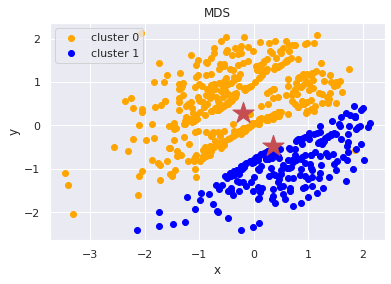

In [164]:
clustering_scatterplot(points=XYcoordinates_MDS_k2[:-2,:], 
                       labels=data_cluster_2.labels_, 
                       centers=XYcoordinates_MDS_k2[-2:,:], 
                       title='MDS')

OBSERVATION : Cluster is well seperated lets see if it produces meaningful data 

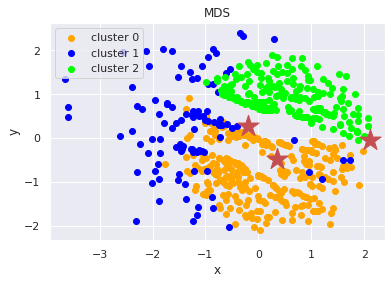

In [165]:
clustering_scatterplot(points=XYcoordinates_MDS_k3[:-3,:], 
                       labels=data_cluster_3.labels_, 
                       centers=XYcoordinates_MDS_k2[-3:,:], 
                       title='MDS')

OBSERVATION: Clusters are scattered by each other , not a suitable value of K 

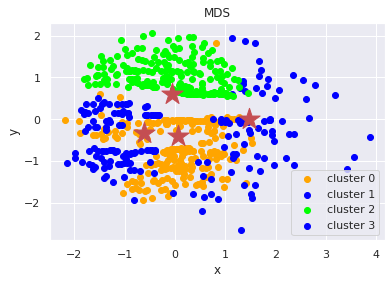

In [166]:
clustering_scatterplot(points=XYcoordinates_MDS_k4[:-4,:], 
                       labels=data_cluster_4.labels_, 
                       centers=XYcoordinates_MDS_k4[-4:,:], 
                       title='MDS')


OBSERVATION -There is minute separation between clusters , yet its overallped and unevenly distributed 

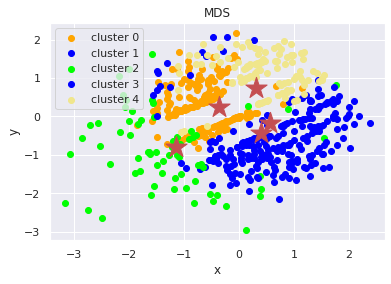

In [167]:
clustering_scatterplot(points=XYcoordinates_MDS_k5[:-5,:], 
                       labels=data_cluster_5.labels_, 
                       centers=XYcoordinates_MDS_k5[-5:,:], 
                       title='MDS')

CLUSTER 2 IS SPREAD ALL OVER 

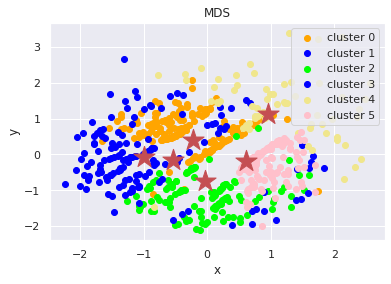

In [168]:
clustering_scatterplot(points=XYcoordinates_MDS_k6[:-6,:], 
                       labels=data_cluster_6.labels_, 
                       centers=XYcoordinates_MDS_k6[-6:,:], 
                       title='MDS')

Some seperation between clusters , two centroids overlaping

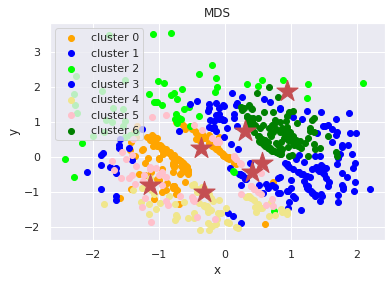

In [169]:
clustering_scatterplot(points=XYcoordinates_MDS_k7[:-7,:], 
                       labels=data_cluster_7.labels_, 
                       centers=XYcoordinates_MDS_k5[-7:,:], 
                       title='MDS')

CLUSTER 2 SEEMS TO BE OUT OF ORDER 

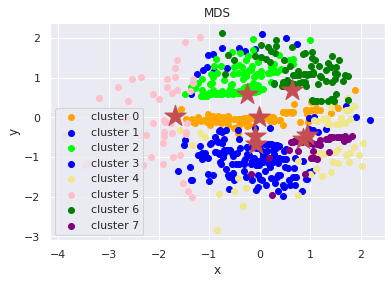

In [170]:
clustering_scatterplot(points=XYcoordinates_MDS_k8[:-8,:], 
                       labels=data_cluster_8.labels_, 
                       centers=XYcoordinates_MDS_k8[-8:,:], 
                       title='MDS')

OVERCROWDED BUT , THERE IS A SEPARATION BETWEEN SOME CLUSTER GROUPS 

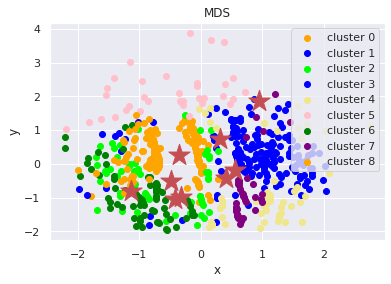

In [171]:
clustering_scatterplot(points=XYcoordinates_MDS_k9[:-9,:], 
                       labels=data_cluster_9.labels_, 
                       centers=XYcoordinates_MDS_k5[-9:,:], 
                       title='MDS')

OVERCROWDED 

**T-SNE**

In [172]:
XYcoordinates_TSNE_k2 = manifold.TSNE(n_components=2).fit_transform(data_and_centers_k2)
XYcoordinates_TSNE_k3 = manifold.TSNE(n_components=2).fit_transform(data_and_centers_k3)
XYcoordinates_TSNE_k4 = manifold.TSNE(n_components=2).fit_transform(data_and_centers_k4)
XYcoordinates_TSNE_k5 = manifold.TSNE(n_components=2).fit_transform(data_and_centers_k5)
XYcoordinates_TSNE_k6 = manifold.TSNE(n_components=2).fit_transform(data_and_centers_k6)
XYcoordinates_TSNE_k7 = manifold.TSNE(n_components=2).fit_transform(data_and_centers_k7)
XYcoordinates_TSNE_k8 = manifold.TSNE(n_components=2).fit_transform(data_and_centers_k8)
XYcoordinates_TSNE_k9 = manifold.TSNE(n_components=2).fit_transform(data_and_centers_k9)

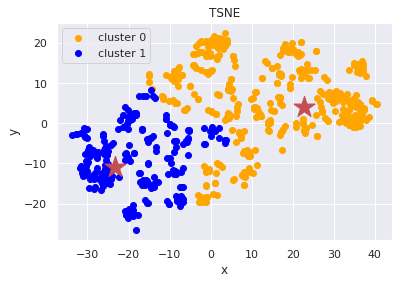

In [173]:
clustering_scatterplot(points=XYcoordinates_TSNE_k2[:-2,:], 
                       labels=data_cluster_2.labels_,
                       centers=XYcoordinates_TSNE_k2[-2:,:], 
                       title='TSNE')

GOOD SEPARATION AND CENTROIDS ARE DISTINCT

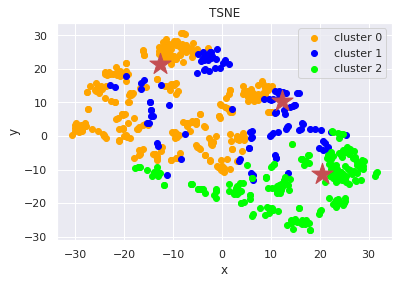

In [174]:
clustering_scatterplot(points=XYcoordinates_TSNE_k3[:-3,:], 
                       labels=data_cluster_3.labels_,
                       centers=XYcoordinates_TSNE_k3[-3:,:], 
                       title='TSNE')

NOT A GOOD FIT

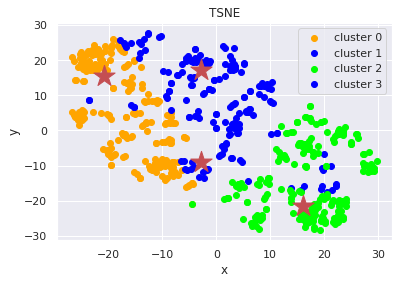

In [175]:
clustering_scatterplot(points=XYcoordinates_TSNE_k4[:-4,:], 
                       labels=data_cluster_4.labels_,
                       centers=XYcoordinates_TSNE_k4[-4:,:], 
                       title='TSNE')

CENTROIDS ARE DISTCINCT , AVERAGE OVERLAPPING OF POINTS

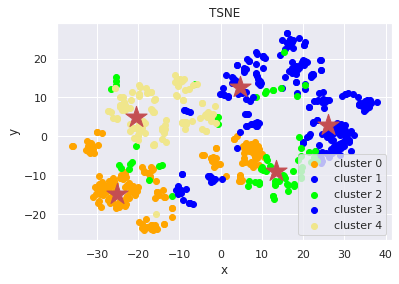

In [176]:
clustering_scatterplot(points=XYcoordinates_TSNE_k5[:-5,:], 
                       labels=data_cluster_5.labels_,
                       centers=XYcoordinates_TSNE_k5[-5:,:], 
                       title='TSNE')

OBSERVATION CENTROID ARE DISTINCT ,OVERLAPPING MODERATE 

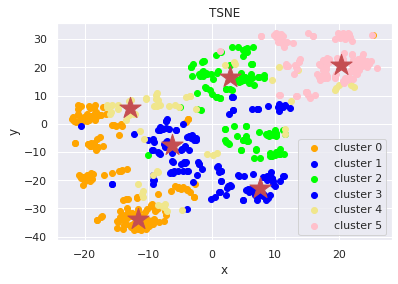

In [177]:
clustering_scatterplot(points=XYcoordinates_TSNE_k6[:-6,:], 
                       labels=data_cluster_6.labels_,
                       centers=XYcoordinates_TSNE_k6[-6:,:], 
                       title='TSNE')

CENTROIDS ARE DISTINCT ,MINIMAL OVERLLAPING 

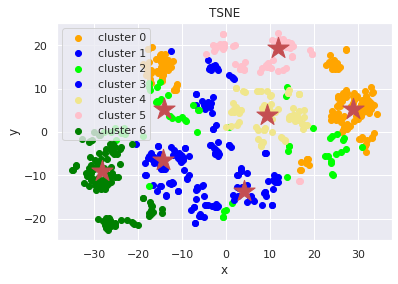

In [178]:
clustering_scatterplot(points=XYcoordinates_TSNE_k7[:-7,:], 
                       labels=data_cluster_7.labels_,
                       centers=XYcoordinates_TSNE_k7[-7:,:], 
                       title='TSNE')

DATA IS OVERLAPPING BUT DISTINCT CENTROIDS 

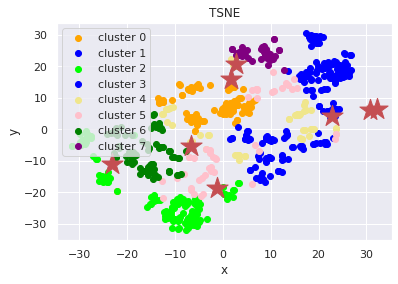

In [179]:
clustering_scatterplot(points=XYcoordinates_TSNE_k8[:-8,:], 
                       labels=data_cluster_8.labels_,
                       centers=XYcoordinates_TSNE_k2[-8:,:], 
                       title='TSNE')

OBSERVATION: CENTEROIDS ARE OVERLAPPING 

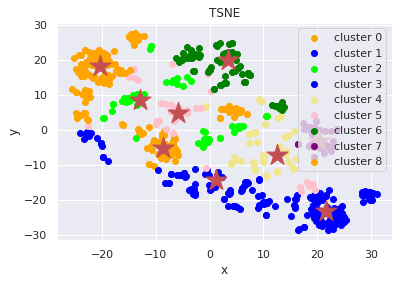

In [180]:
clustering_scatterplot(points=XYcoordinates_TSNE_k9[:-9,:], 
                       labels=data_cluster_9.labels_,
                       centers=XYcoordinates_TSNE_k9[-9:,:], 
                       title='TSNE')

OBSERVATION-SPARSELY DISTRIBUTED AND DECENT OVERLAP OF DATA 

# **CLUSTER ANALYSIS CONCLUSION** 

As per visualization from MDS AND T-SNE , The probable fit value of k = 4 , as per graphs 2 is good fit but does not yeild any information from the cluster obtained hence i am choosing 4 

In [181]:
df['cluster']=data_cluster_4.labels_
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.316199,0.803913,1.045727,0.694743,0.836449,0.943925,0.014019,1.000000,0.000000,0.112150,0.056075,0.280374,0.000000,0.546729,0.654206,0.791263
1,0.365079,1.807014,1.568259,0.706349,0.873016,0.809524,0.079365,0.746032,0.000000,0.349206,0.031746,0.031746,0.349206,0.269841,0.698413,1.715616
2,0.244866,0.816979,1.033096,0.722512,0.872038,0.739336,0.018957,0.649289,0.009479,0.113744,0.042654,0.213270,1.000000,0.000000,0.772512,0.759537
3,0.079365,0.829551,0.954217,0.733135,0.849206,0.634921,0.007937,0.000000,0.007937,0.095238,0.071429,0.214286,0.000000,0.539683,0.595238,0.730261


In [230]:
df['cluster']=data_cluster_2.labels_
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.247594,0.918059,1.074684,0.707152,0.845144,0.832021,0.018373,0.648294,0.002625,0.131234,0.057743,0.230971,0.0,0.530184,0.637795,0.869577
1,0.248927,0.914184,1.078738,0.723498,0.871245,0.738197,0.025751,0.648069,0.008584,0.137339,0.042918,0.197425,1.0,0.000000,0.768240,0.851417


When value of k =2 , The clients belonging to cluster 1 lives in semi urban areas and have higher loan susbcription , but the difference between rest of the parameters are very close , like married, depedents, loanAmount, etc , so certain parameters have to be ommited while checking the loan status of a client, so that is the reason i chose k= 4 for more distinction

The chosen value of k = 4
Cluster feature analysis 
1. Cluster 0-Most of them reside in urban areas have least applicant incomes and has least loan amount term , most of clients here are male and are married posses poor education status has moderate rate of loan being granted to them 
2. Cluster 1-Most of them are self employed and married have dependents posses highest total income, applicant income and loan amount and are mostly gradute 
3. Cluster 2-Resides in semi urban areas could be married with low number of  dependents , moderately okay applicant and total income who are not qaulified as graduates have **"higest loan status granted "**
4. Cluster 3 -Most of them are not married and do not have dependents reside in urban areas **has the least loan granted rate** and least loan amount , they are neither self employed nor employed , potentially could be students or retired folks, could be women more than men.

# **TASK 3-TO FIND VALUE OF K**

The Type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1

In [182]:
#scaler = preprocessing.StandardScaler()
#df = scaler.fit_transform(df)

In [183]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
 
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / data.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [184]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.4200181323606376
2 : 1.2981263130905207
3 : 1.2397553891547541
4 : 1.1799945260928644
5 : 1.1266194199602524
6 : 1.089529765137076
7 : 1.059148833337958
8 : 1.0303422890258573
9 : 1.0099202828104399


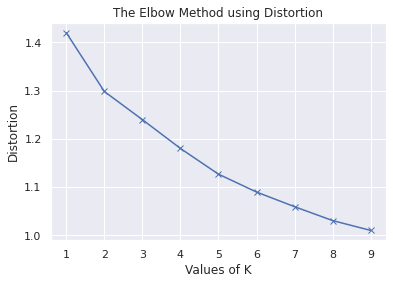

In [185]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [186]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 1316.9759347582844
2 : 1127.6180114587287
3 : 1005.8857488531119
4 : 918.8090667389929
5 : 847.0777775820591
6 : 797.3095387447244
7 : 761.5714220936314
8 : 724.9632432893725
9 : 699.7743504311259


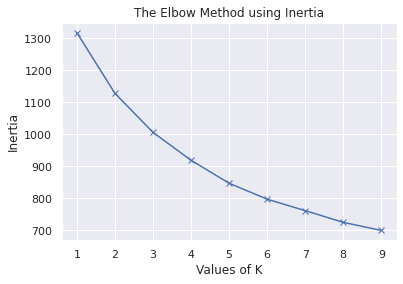

In [187]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

The graph shows dip at 2 , and decreasing towards the end .But from my K=2 cluster analysis i couldnt find any meaningful data hence am assuming values greater than 8 can be possible fit but visualization from MDS and T-SNE shows as k becomes bigger the clusters are overlapping and difficult to analyse 

# **DBSCAN ,MEAN -SHIFT ,AGGLOMERATIVE CLUSTERING**

From the below analysis i found out that agglomerative gives best results than K-Means 
Function for printing 

In [200]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(12,6))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(labels[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})
    
    plt.title(title, size=24)

**DBSCAN**

DBSCAN : Doesnt yeild better cluster results 

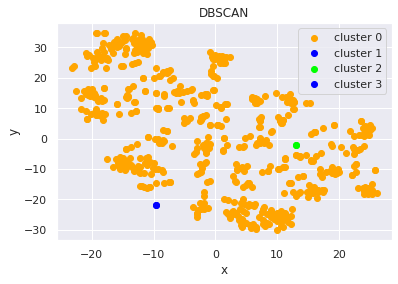

In [231]:
dbscan = cluster.DBSCAN(eps=1.25, min_samples=2).fit(data)

XYcoordinates_dbscan = manifold.TSNE(n_components=2).fit_transform(data)

clustering_scatterplot(points=XYcoordinates_dbscan, 
                       labels=dbscan.labels_,
                       centers=None, 
                       title='DBSCAN')

**MEAN-SHIFT METHOD**

it seems this method doesnt yeild potential clusters so do not use this 

In [221]:
bandwidth = cluster.estimate_bandwidth(data, quantile=0.2, n_samples=500)
meanshift = cluster.MeanShift(bandwidth=bandwidth)
meanshift.fit(data)

labels = meanshift.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print(n_clusters_)
data_and_centers_MEANSHIFT = np.r_[data,meanshift.cluster_centers_]
XYcoordinates_MEANSHIFT = manifold.TSNE(n_components=2).fit_transform(data_and_centers_MEANSHIFT)
print("transformation complete")

6
transformation complete


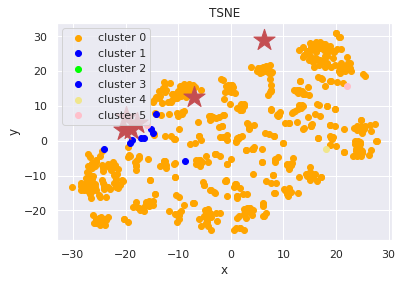

In [224]:
clustering_scatterplot(points=XYcoordinates_MEANSHIFT[:-6,:], 
                       labels=meanshift.labels_, 
                       centers=XYcoordinates_MEANSHIFT[-6:,:], 
                       title='TSNE')

**AGGLOMERATIVE**

AGGLOMERATIVE CLUSTERING -YEILDS THE BEST RESULT OUT OF ALL FOR K >8 or more

PROPER SEGREGRATION OF CLUSTERS 

transformation complete


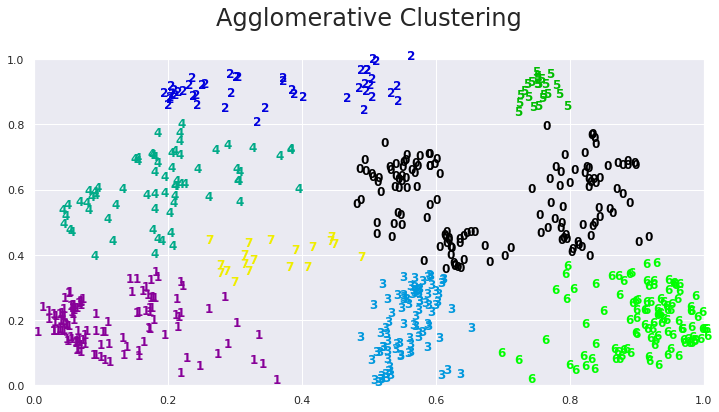

In [211]:
k = 8
linkage = 'average'
agg_clus = manifold.SpectralEmbedding(n_components=2).fit_transform(data)
print("transformation complete")
clustering = cluster.AgglomerativeClustering(linkage=linkage, n_clusters=k).fit(agg_clus)
plot_clustering(agg_clus, clustering.labels_, "Agglomerative Clustering\n")
plt.show()